In [1]:
import numpy as np
import pandas as pd
import os
import re

Store all 20 Characteristics in a array

In [2]:
characteristics = [
    'alt.atheism',
    'comp.graphics',
    'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware',
    'comp.sys.mac.hardware',
    'comp.windows.x',
    'misc.forsale',
    'rec.autos',
    'rec.motorcycles',
    'rec.sport.baseball',
    'rec.sport.hockey',
    'sci.crypt',
    'sci.electronics',
    'sci.med',
    'sci.space',
    'soc.religion.christian',
    'talk.politics.guns',
    'talk.politics.mideast',
    'talk.politics.misc',
    'talk.religion.misc'
]

## Steps to get data from file
1. Loop through all Files and Folders
2. Get data from file
3. Remove same header from file
4. Remove all special characters
5. Using np.unique method to get unique keywords and their counts from file
6. Store them as dictonary as separate row in data array
7. Store characteristic as result in Y_data array

In [3]:
data=[]
Y_data = []

index=1
# Looping through all charchteristics folders
for ch in characteristics:
    
    print(ch,index)
    
    # Get list of all files in charchteristics folder
    current_dir = os.listdir('data/'+ch)
    
    # Looping through all files
    for file_name in current_dir:
        
#         print(ch,file_name)
        
        with open("data/"+ch+"/"+file_name, encoding = None) as f:
            
            # Read file and replace all special characters with space
            og_str = f.read()
            og_str = og_str[og_str.find('\n\n'):]
            new_str = re.sub('[^a-zA-Z0-9]', ' ', og_str)
#             print('new file',new_str[:100])
            
            
            values, counts = np.unique(new_str.split(), return_counts=True)
            
            val_dic = {}
            
            for i in range(len(values)):
#                 if(counts[i]<3):
#                     continue
                val_dic[values[i]] = counts[i]
            
            # Append new string
            data.append(val_dic)
            Y_data.append(ch)
    
    index+=1
            

alt.atheism 1
comp.graphics 2
comp.os.ms-windows.misc 3
comp.sys.ibm.pc.hardware 4
comp.sys.mac.hardware 5
comp.windows.x 6
misc.forsale 7
rec.autos 8
rec.motorcycles 9
rec.sport.baseball 10
rec.sport.hockey 11
sci.crypt 12
sci.electronics 13
sci.med 14
sci.space 15
soc.religion.christian 16
talk.politics.guns 17
talk.politics.mideast 18
talk.politics.misc 19
talk.religion.misc 20


In [4]:
print("Total Articles Size :",len(data))

Total Articles Size : 19997


Combine all files keywords and add up all counts and store it in global variable

In [5]:
total_freq = {}
for row in data:
    for key in row:
        if key in total_freq:
            total_freq[key]+=row[key]
        else:
            total_freq[key]=row[key]

In [6]:
print("Total No. of Keywords :",len(total_freq.keys()))

Total No. of Keywords : 194331


Create numpy arrays for keywords and their counts

In [7]:
X = np.array(list(total_freq.keys()))
Y = np.array(list(total_freq.values()))

In [8]:
# import nltk
# nltk.download('stopwords')

Get stopwords and store it as dictonary to access faster

In [9]:
from nltk.corpus import stopwords
from collections import Counter
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

Check if keyword is not stopword and length of keywords is greater than 2.

Filter X and Y array

In [10]:
X = np.char.lower(X)
check_stopwords = []
for i in X:
    check_stopwords.append(i not in stopwords_dict and len(i) > 2)
check_stopwords = np.array(check_stopwords)
print(check_stopwords)

X = X[check_stopwords]
Y = Y[check_stopwords]

[False  True  True ...  True  True  True]


Sort Y (counts) in decreasing order.

Take first 3000 keywords which occured most.

In [11]:
maxIndicies = np.argsort(Y)[::-1]
print(len(maxIndicies))

top_k = 3000
most_X = X[maxIndicies[:top_k]]
most_Y = Y[maxIndicies[:top_k]]
# for i in most_X:
#     print(i,len(i))

191514


Plot line graph to see relationship between Frequency of Words and No. of words

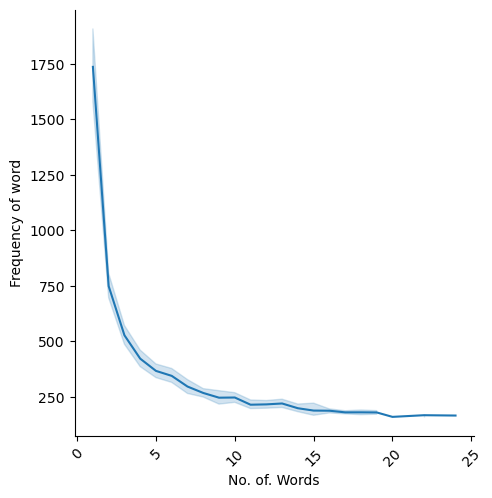

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt_y,plt_x = np.unique(most_Y,return_counts=True)
sns.relplot(x=plt_x,y=plt_y,kind="line")
plt.xlabel('No. of. Words')
plt.ylabel('Frequency of word')
plt.xticks(rotation=45) 
# Show the plot
plt.show()


Set feature_names and length of features

In [13]:
feature_names = most_X
features_size = len(feature_names)

Intiliaze X arrary with total rows and features as columns

In [14]:
X_data = [[0 for j in range(features_size)] for i in range(len(data))]

Loop through data and features and set X array to number of times keyword appered in file

In [15]:
for i in range(len(data)):
    row = data[i]
    row_arr = []
    for j in range(features_size):
        key = feature_names[j]
        if key in row:            
            X_data[i][j] = row[key]

Divide X_data and Y_data to training and testing data

In [16]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X_data,Y_data,random_state = 42)

## Implementation of Multinominal NaiveBayes Algorithm

In [17]:
class NaiveBayesAlg:
    
#     Function to train on sample data
    def fit(self,X_train,Y_train):
        
#         Convert sample to numpy array
        X_train = np.array(X_train)
        Y_train = np.array(Y_train)
        
#         Get characteristics and their counts based on Y_train
        characteristics, total_counts = np.unique(Y_train,return_counts=True)
        size = len(characteristics)
        features_size = len(X_train[0])
        
#         Initliaze count and prod variable to 2d array with characteristics as row and feature_size as col

        count = [[0 for j in range(features_size)] for i in range(size)]
        prob = [[0 for j in range(features_size)] for i in range(size)]
        
#         Loop through Characteristics
        for i in range(size): 
#         Check if Y_train has the characterisitics. This will give us a boolean array
            check_charc = (Y_train == characteristics[i])
            
            print(i+1,"Counting on",characteristics[i],"Charcteristic")
            
#             Loop through Features
            for j in range(features_size):
        
#              Get sum of all features columns where Y_train has characheristics
                count[i][j] =X_train[check_charc][:,j].sum()
            
            
#        Loop through Characteristics
        for i in range(size):
            
            print(i+1,"Predicting on",characteristics[i],"Charcteristic")
            
#             Loop through Features
            for j in range(features_size):
#                 Calculate Probability with laplace correction using given formula
#                 Formula = count of words when Y is characteristic / total count of words when Y is characteristic
                prob[i][j] = (count[i][j] + 1) / (sum(count[i]) + features_size)
        
#         Assign probabilities , characteristics and total_counts
        self.prob=np.array(prob)
        self.cls=characteristics
        self.total_counts = total_counts
        
#         Get Probability of Row for given class
    def probability(self,x,cls):
        num_features = len(x)
        output = 0
        
#         Loop through all features
        for j in range(num_features):
#             Get Probability of characteritics and feature and multiply with count of feature in testing data
#             To avoid out of range, take log of multiplication with turns it into addition
            current_prob = np.log(self.prob[cls][j])*x[j]
            output += current_prob
        
        return output
            
#     Get best class for each row
    def predictSingle(self,x):
#         Initilize best_p and best_class
        best_p=-1000
        best_class = -1
        
#         Loop through all charcterisitics
        for cls in range(len(self.cls)):
#         Get current probability for current characteristic
            p_current_class = self.probability(x,cls)
            
#             Check if current probability is greater than previous, set current probability as best_p
            if(best_p < p_current_class):
                best_p = p_current_class
                best_class = cls
                
#         Return best_class
        return self.cls[best_class]
            
#     Function to get all predictions of all rows in testing data
    def predict(self,X_test):
#         Intiliaze  y_pred to 0 for all rows
        y_pred = [0 for i in range(len(X_test))]
    
#         Loop through all rows
        for i in range(len(X_test)):
#             Printing for debugging
            if i%500 == 0:
                print("Getting Probability for testing row",i+1,"of",len(X_test))
            x=X_test[i]
            
#             Call predictSingle function to get best characteristic
            x_class = self.predictSingle(x)
    
#             Set best charcteristic to y_pred
            y_pred[i]=x_class
        return y_pred
        

Create NaiveBayesAlg Object and call fit and predict function

In [18]:
alg = NaiveBayesAlg()
alg.fit(X_train,Y_train)

1 Counting on alt.atheism Charcteristic
2 Counting on comp.graphics Charcteristic
3 Counting on comp.os.ms-windows.misc Charcteristic
4 Counting on comp.sys.ibm.pc.hardware Charcteristic
5 Counting on comp.sys.mac.hardware Charcteristic
6 Counting on comp.windows.x Charcteristic
7 Counting on misc.forsale Charcteristic
8 Counting on rec.autos Charcteristic
9 Counting on rec.motorcycles Charcteristic
10 Counting on rec.sport.baseball Charcteristic
11 Counting on rec.sport.hockey Charcteristic
12 Counting on sci.crypt Charcteristic
13 Counting on sci.electronics Charcteristic
14 Counting on sci.med Charcteristic
15 Counting on sci.space Charcteristic
16 Counting on soc.religion.christian Charcteristic
17 Counting on talk.politics.guns Charcteristic
18 Counting on talk.politics.mideast Charcteristic
19 Counting on talk.politics.misc Charcteristic
20 Counting on talk.religion.misc Charcteristic
1 Predicting on alt.atheism Charcteristic
2 Predicting on comp.graphics Charcteristic
3 Predicti

In [19]:
Y_predict = alg.predict(X_test)

Getting Probability for testing row 1 of 5000
Getting Probability for testing row 501 of 5000
Getting Probability for testing row 1001 of 5000
Getting Probability for testing row 1501 of 5000
Getting Probability for testing row 2001 of 5000
Getting Probability for testing row 2501 of 5000
Getting Probability for testing row 3001 of 5000
Getting Probability for testing row 3501 of 5000
Getting Probability for testing row 4001 of 5000
Getting Probability for testing row 4501 of 5000


In [20]:
# Various metrics for understanding how well our model has performed.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report")
print(classification_report(Y_test, Y_predict))
print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_predict))
print()
print("Accuracy Score")
print(accuracy_score(Y_test, Y_predict) * 100, "%", sep="")

Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.49      0.50       237
           comp.graphics       0.63      0.53      0.58       237
 comp.os.ms-windows.misc       0.61      0.59      0.60       271
comp.sys.ibm.pc.hardware       0.57      0.52      0.55       247
   comp.sys.mac.hardware       0.67      0.53      0.59       253
          comp.windows.x       0.75      0.59      0.67       237
            misc.forsale       0.68      0.76      0.72       247
               rec.autos       0.70      0.69      0.70       254
         rec.motorcycles       0.74      0.81      0.78       259
      rec.sport.baseball       0.76      0.69      0.72       244
        rec.sport.hockey       0.88      0.76      0.82       251
               sci.crypt       0.80      0.63      0.71       242
         sci.electronics       0.63      0.58      0.60       269
                 sci.med       0.78      0.67      0.

## Inbuilt Implementation Of Naive Bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,Y_train)

MultinomialNB()

In [22]:
Y_pred_clf = clf.predict(X_test)

In [23]:
# Various metrics for understanding how well our model has performed.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Classification Report")
print(classification_report(Y_test, Y_pred_clf))
print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred_clf))
print()
print("Accuracy Score")
print(accuracy_score(Y_test, Y_pred_clf) * 100, "%", sep="")

Classification Report
                          precision    recall  f1-score   support

             alt.atheism       0.58      0.65      0.61       237
           comp.graphics       0.63      0.59      0.61       237
 comp.os.ms-windows.misc       0.63      0.64      0.63       271
comp.sys.ibm.pc.hardware       0.59      0.57      0.58       247
   comp.sys.mac.hardware       0.67      0.56      0.61       253
          comp.windows.x       0.77      0.68      0.72       237
            misc.forsale       0.68      0.79      0.73       247
               rec.autos       0.71      0.77      0.74       254
         rec.motorcycles       0.74      0.85      0.79       259
      rec.sport.baseball       0.78      0.80      0.79       244
        rec.sport.hockey       0.89      0.87      0.88       251
               sci.crypt       0.83      0.81      0.82       242
         sci.electronics       0.66      0.69      0.67       269
                 sci.med       0.78      0.78      0.